In [1]:
# Dependencies
import numpy as np
import pandas as pd
import sklearn.datasets
import matplotlib as mpl

# pyplot
import matplotlib.pyplot as plt

In [2]:
# Load dataset
dataset = sklearn.datasets.fetch_openml("mnist_784", version = 1, as_frame = False)

# Investigate what kinds of contents the dataset has:
dataset.keys()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# In the dataset's contents, the "data" element contains 70,000 images of hand-written digits (0..9).
# The "target" element is an array (=list) of 70,000 labels that tell which digit each image is

# Following a common convention, let's call the images in the "data" elements as X,
# and the labels in the "target" elements as y:
X = dataset["data"]
y = dataset["target"]

# Change the targets' data type from text to numbers, because most machine learning
# algorithms have been programmed to operate on numbers:
y = y.astype(np.uint8)

In [4]:
#Split the dataset 

# We'll use the first 60000 images for training, and everything after them for testing:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:

# Support vector machine classifier:
from sklearn.svm import SVC
classifier = SVC()

# Training:
classifier.fit(X_train, y_train)                # Train the classifier with our training data (images and their correct labels)

# 3-4 minutes to run.

SVC()

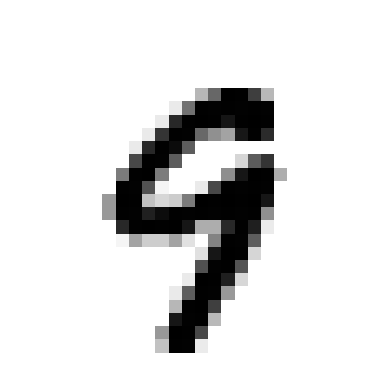

This image has been labelled as 9
The model predicted this image as 9


In [6]:

# Choose an image to try the clasifier on
index = 687          # Any value between 0 and 69999 can be used here (there are 70,000 images)

image = X[index]
label = y[index]

# Rearrange the image's 784 pixels into a 28x28 grid:
image_reshaped = image.reshape(28,28)

# Now display the image and its correct label:
plt.imshow(image_reshaped, cmap="binary")        # Define that the image uses a binary color map
plt.axis("off")                                  # Define that we do not need x and y axes this time
plt.show()                                       # Now show the image
print("This image has been labelled as " + str(label))  # Also print what this digit's label is in the dataset

# Test how the classifier classifies ("predicts") the label of the image that we looked at above:
prediction = classifier.predict([image])[0]
print("The model predicted this image as " + str(prediction))


In [7]:
# Measure how well the classifier performs overall, using the entire train set
# 5-fold cross-validation:

from sklearn.model_selection import cross_val_score
cross_val_score(classifier, X_train, y_train, cv=5, scoring="accuracy")

# ~15 mins for 5-fold

array([0.97941667, 0.97633333, 0.97616667, 0.97416667, 0.97858333])

In [8]:
# Confusion matrix: Analysing where the errors happen

# If we had a perfect classifier, the output would be [1.000, 1.000, 1.000].
# Of course we want to know where the errors are: what values does our classifier misclassify?
# We can do that with by pringint  "confusion matrix"

# Let's train our classifier again, this time getting out more data about its behaviour:
# after every fold of training, get labels that the classifiers give to every image that they analyse:

from sklearn.model_selection import cross_val_predict
y_predictions = cross_val_predict(classifier, X_train, y_train, cv=2)

In [9]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_train,y_predictions)

# The confusion matrix tells how many images are misclassified:
# Every row represents actual labels, and every column represents predicted labels.
# Let's have a look:
conf_matrix

array([[5853,    3,   11,    2,    5,   11,   16,    2,   15,    5],
       [   1, 6663,   24,   14,    8,    0,    2,    9,   12,    9],
       [  18,   14, 5790,   19,   26,    9,   12,   35,   28,    7],
       [   4,   14,   56, 5870,    1,   70,    2,   35,   58,   21],
       [   8,   12,   11,    1, 5693,    0,   21,   10,   11,   75],
       [  15,    8,   12,   55,   15, 5247,   35,    3,   20,   11],
       [  22,    8,    5,    0,   11,   32, 5828,    0,   12,    0],
       [   5,   27,   38,    4,   36,    1,    2, 6091,    6,   55],
       [  10,   33,   21,   43,   20,   38,   21,    9, 5630,   26],
       [  17,    9,    5,   42,   79,   19,    1,   63,   24, 5690]],
      dtype=int64)

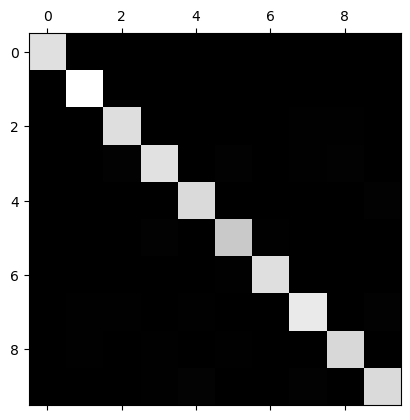

In [10]:
# Most of the numbers are in the diagonal. This means, for example, for an image whose true label is 3,
# the classifier's predicted label is also 3. Off-diagonal values tell where the predictions have gone wrong.

# Confusion matrix is easier to look at as an image:
mpl.pyplot.matshow(conf_matrix, cmap=mpl.cm.gray)

The confusion matrix doesnt show any major misclaisifications

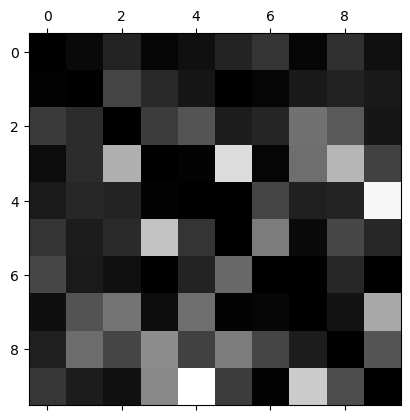

In [11]:
# The confusion matrix is not yet helping us to see where the errors happen.
# With the following modifications, we can make this information more visible:

row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums

np.fill_diagonal(norm_conf_matrix, 0)
mpl.pyplot.matshow(norm_conf_matrix, cmap=mpl.cm.gray)
mpl.pyplot.show()

The biggest confusions seem to be happening with the digits 4 and 9

In [13]:
# Final evaluation using the dataset's test split

final_test_predictions = classifier.predict(X_test)

# Find out what the accuracy is on the test set:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,final_test_predictions)


0.9792

Accuracy of 98% is relatively well suited for the task of digit clasification